# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>
<div>
    <p>
        <li>The percentage difference of call receiving between white and black as the test statisticis appropriate for this problem. 
        <li>CLT applies.
        <li>H0: The percentage difference of call receiving between white and black is zero - w_call_mean_pl - b_call_mean_pl = 0.
        <li>H1: w_call_mean_pl - b_call_mean_pl > 0 .
    </p>
    
</div>

The percentage of white resume receiving call:  0.09650924024640657 
 The percentage of black resume receiving call:  0.06447638603696099
Populating the interactive namespace from numpy and matplotlib


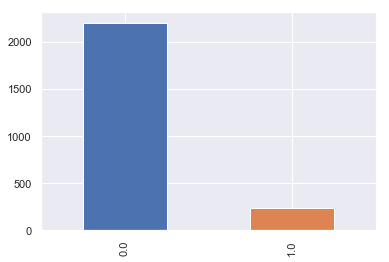

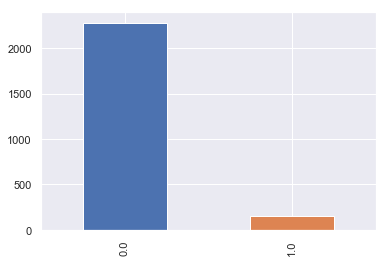

In [29]:
w = data[data.race=='w']
b = data[data.race=='b']
w_call = w['call']
b_call = b['call']
w_call_per = np.sum(w_call)/len(w_call)
b_call_per = np.sum(b_call)/len(b_call)
print('The percentage of white resume receiving call: ', w_call_per, '\n', 'The percentage of black resume receiving call: ',b_call_mean)

import seaborn as sn
%pylab inline
sn.set()
w_call.value_counts().plot(kind='bar')
plt.show()
b_call.value_counts().plot(kind='bar')
plt.show()


In [35]:
# Your solution to Q3 here
# Hypothesis tesing using bootstrap approach

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_rececall_per(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.sum(data_1)/len(data_1)-np.sum(data_2)/len(data_2)

    return diff

obs_test_stat = w_call_per - b_call_per
print('The value of test statistic of Sample: ', obs_test_stat)
bs_test_stat_reps = draw_perm_reps(w_call, b_call, diff_of_rececall_per, size = 5000)

p = np.sum(bs_test_stat_reps >= obs_test_stat)/len(bs_test_stat_reps)
print('p-value: ', p)


The value of test statistic of Sample:  0.032032854209445585
p-value:  0.0


In [37]:
#r = np.corrcoef(data['race'],data['call'])
#print(r)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>
<div>
    <li>The analysis result indicates there is a significant difference whether receiving an interview call between white resume and black resume. The white resume receiving call rate is higer that black resume significatly. 
    <li>But this does not mean race/name is the most important factor in callback success. The other factors might play an improtant role as well.
</div>